In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [13]:
data=pd.read_csv(r'C:\Users\USER\Desktop\DS FILES\StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [5]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

1. Find out how many males and females participated in the test.

In [6]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

2. What do you think about the students' parental level of education?

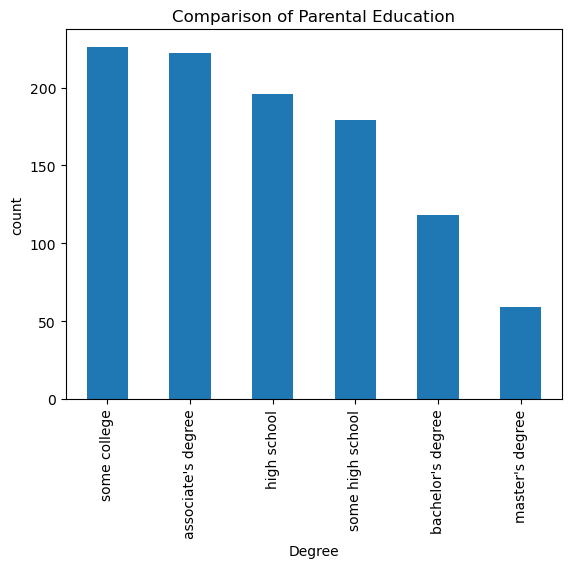

In [7]:
data['parental level of education'].value_counts(normalize = True)
data['parental level of education'].value_counts(dropna = False).plot.bar()
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

In [26]:
data['parental level of education'].value_counts(dropna=False)

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

3. Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course

In [8]:
data.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [9]:
data.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


4. What do you think about the scoring variation for math, reading and writing
based on
● Gender
● Test preparation course

In [10]:
data.groupby('gender')[['math score', 'reading score', 'writing score']].var()

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


In [11]:
data.groupby('test preparation course')[['math score', 'reading score', 'writing score']].var()

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


5. The management needs your help to give bonus points to the top 25% of
students based on their math score, so how will you help the management
to achieve this.

In [20]:
# First find the deatils of sudents who are eligible for the bonus.Top 25% means 250 students out of 1000,
#since there are repeated scores its 255 students.

ms= data['math score'].quantile(q=.75)
data[data['math score'].ge(ms)].reset_index()



,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,414,female,group A,high school,free/reduced,completed,77,88,85
1,415,female,group B,master's degree,free/reduced,completed,77,97,94
2,416,female,group B,bachelor's degree,free/reduced,none,77,85,87
3,417,female,group B,master's degree,standard,none,77,90,84
4,418,female,group B,high school,standard,completed,77,82,89
5,419,female,group C,bachelor's degree,standard,none,77,88,87
6,420,female,group C,bachelor's degree,standard,completed,77,94,95
7,421,female,group C,some college,free/reduced,none,77,90,91
8,422,female,group C,some high school,standard,completed,77,90,85
9,423,female,group C,some high school,standard,none,77,91,88
